# Three generations seeking romance - Regression & Classification

<img src="https://static.vecteezy.com/system/resources/previews/024/179/252/non_2x/portrait-of-smiling-three-generations-of-women-posing-together-waving-with-hand-happy-girl-child-with-mother-and-grandmother-show-family-unity-illustration-vector.jpg" alt="Three Generations of Women">

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import warnings

# Suppress DataConversionWarning
warnings.filterwarnings(action='ignore')

In [2]:
df=pd.read_csv('profiles.csv')

In [3]:
df.shape

(60552, 31)

In [4]:
empty_rows = df[df.isnull().all(axis=1)]
print("The number of rows with all columns empty:", len(empty_rows))
print(empty_rows)

The number of rows with all columns empty: 51038
       age body_type diet drinks drugs education essay0 essay1 essay2 essay3  \
9514   NaN       NaN  NaN    NaN   NaN       NaN    NaN    NaN    NaN    NaN   
9515   NaN       NaN  NaN    NaN   NaN       NaN    NaN    NaN    NaN    NaN   
9516   NaN       NaN  NaN    NaN   NaN       NaN    NaN    NaN    NaN    NaN   
9517   NaN       NaN  NaN    NaN   NaN       NaN    NaN    NaN    NaN    NaN   
9518   NaN       NaN  NaN    NaN   NaN       NaN    NaN    NaN    NaN    NaN   
...    ...       ...  ...    ...   ...       ...    ...    ...    ...    ...   
60547  NaN       NaN  NaN    NaN   NaN       NaN    NaN    NaN    NaN    NaN   
60548  NaN       NaN  NaN    NaN   NaN       NaN    NaN    NaN    NaN    NaN   
60549  NaN       NaN  NaN    NaN   NaN       NaN    NaN    NaN    NaN    NaN   
60550  NaN       NaN  NaN    NaN   NaN       NaN    NaN    NaN    NaN    NaN   
60551  NaN       NaN  NaN    NaN   NaN       NaN    NaN    NaN    NaN  

In [5]:
df= df.dropna(subset=['age'])

In [6]:
df['ethnicity'].value_counts()

ethnicity
white                                                                5278
asian                                                                 863
hispanic / latin                                                      426
black                                                                 326
other                                                                 319
                                                                     ... 
native american, pacific islander, hispanic / latin, white, other       1
indian, pacific islander                                                1
asian, middle eastern, black                                            1
asian, middle eastern, indian                                           1
middle eastern, hispanic / latin, white, other                          1
Name: count, Length: 112, dtype: int64

In [7]:
df

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22.0,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1.0,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35.0,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000.0,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38.0,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",NaN,68.0,-1.0,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23.0,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,white,71.0,20000.0,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29.0,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,NaN,"asian, black, other",66.0,-1.0,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9509,28.0,athletic,strictly anything,socially,never,working on med school,just a normal guy looking for someone around m...,working hard and studying. things are always f...,"i'm excellent with oncology, numbers and algor...",my eyes change color.<br />\n<br />\ni smirk a...,"foo fighters, oasis, bloc party, doves, incubu...",my family and i all live here and i can't thin...,somewhere fun to go or something good to eat.,"studying, followed by shenanigans.","i've actually had some success o

In [8]:
def lowercase_terms(s):
    if isinstance(s, str):  
        terms = s.split(', ')
        first_term = terms[0]
        if 'white' in first_term:
            return 'white'
        elif 'asian' in first_term:
            return 'asian'
        elif 'hispanic / latin' in first_term:
            return 'hispanic / latin'
        elif 'black' in first_term:
            return 'black'
        elif 'other' in first_term:
            return 'other'
        else:
            return first_term  
    else:
        return s  

df['ethnicity'] = df['ethnicity'].apply(lowercase_terms)
#The 'ethnicity' column has been corrected.

In [9]:
df['ethnicity'].value_counts()

ethnicity
white               5384
asian               1143
hispanic / latin     668
black                496
other                319
indian               205
middle eastern       141
native american      111
pacific islander      98
Name: count, dtype: int64

In [10]:
df.isnull().sum()

age               0
body_type       848
diet           3753
drinks          502
drugs          2299
education      1055
essay0          847
essay1         1167
essay2         1465
essay3         1824
essay4         1635
essay5         1700
essay6         2162
essay7         1961
essay8         3153
essay9         1960
ethnicity       949
height            0
income            0
job            1331
last_online       0
location          0
offspring      5628
orientation       0
pets           3162
religion       3253
sex               0
sign           1738
smokes          918
speaks            6
status            0
dtype: int64

In [11]:
df=df.drop(['essay0','essay1','essay2','essay3','essay4','essay5','essay6','essay7','essay8','essay9'],axis=1)

In [12]:
df

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22.0,a little extra,strictly anything,socially,never,working on college/university,asian,75.0,-1.0,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35.0,average,mostly other,often,sometimes,working on space camp,white,70.0,80000.0,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38.0,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1.0,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23.0,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000.0,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29.0,athletic,NaN,socially,never,graduated from college/university,asian,66.0,-1.0,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9509,28.0,athletic,strictly anything,socially,never,working on med school,white,73.0,60000.0,medicine / health,2012-06-30-02-49,"san francisco, california","doesn&rsquo;t have kids, but wants them",straight,likes dogs and likes cats,christianity,m,aries and it&rsquo;s fun to think about,no,"english, spanish (okay)",single
9510,31.0,athletic,mostly anything,socially,sometimes,NaN,white,72.0,-1.0,hospitality / travel,2012-04-05-21-46,"san francisco, california",NaN,gay,NaN,atheism,m,scorpio but it doesn&rsquo;t matter,sometimes,english,single
9511,34.0,average,NaN,socially,NaN,dropped out of college/university,white,71.0,-1.0,hospitality / travel,2012-04-28-12-42,"san francisco, california",doesn&rsquo;t want kids,gay,likes dogs and has cats,atheism and laughing about it,m,leo and it&rsquo;s fun to think about,when drinking,english (fluently),single
9512,29.0,athletic,anything,rarely,never,two-year college,white,70.0,-1.0,NaN,2012-03-01-15-17,"san francisco, california","doesn&rsquo;t have kids, and doesn&rsquo;t wan...",gay,likes dogs and has cats,NaN,m,aries,no,"english (fluently), french (okay), swedish (po...",single


In [13]:
df

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22.0,a little extra,strictly anything,socially,never,working on college/university,asian,75.0,-1.0,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35.0,average,mostly other,often,sometimes,working on space camp,white,70.0,80000.0,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38.0,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1.0,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23.0,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000.0,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29.0,athletic,NaN,socially,never,graduated from college/university,asian,66.0,-1.0,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9509,28.0,athletic,strictly anything,socially,never,working on med school,white,73.0,60000.0,medicine / health,2012-06-30-02-49,"san francisco, california","doesn&rsquo;t have kids, but wants them",straight,likes dogs and likes cats,christianity,m,aries and it&rsquo;s fun to think about,no,"english, spanish (okay)",single
9510,31.0,athletic,mostly anything,socially,sometimes,NaN,white,72.0,-1.0,hospitality / travel,2012-04-05-21-46,"san francisco, california",NaN,gay,NaN,atheism,m,scorpio but it doesn&rsquo;t matter,sometimes,english,single
9511,34.0,average,NaN,socially,NaN,dropped out of college/university,white,71.0,-1.0,hospitality / travel,2012-04-28-12-42,"san francisco, california",doesn&rsquo;t want kids,gay,likes dogs and has cats,atheism and laughing about it,m,leo and it&rsquo;s fun to think about,when drinking,english (fluently),single
9512,29.0,athletic,anything,rarely,never,two-year college,white,70.0,-1.0,NaN,2012-03-01-15-17,"san francisco, california","doesn&rsquo;t have kids, and doesn&rsquo;t wan...",gay,likes dogs and has cats,NaN,m,aries,no,"english (fluently), french (okay), swedish (po...",single


In [14]:
df.isnull().sum()

age               0
body_type       848
diet           3753
drinks          502
drugs          2299
education      1055
ethnicity       949
height            0
income            0
job            1331
last_online       0
location          0
offspring      5628
orientation       0
pets           3162
religion       3253
sex               0
sign           1738
smokes          918
speaks            6
status            0
dtype: int64

In [15]:
df['body_type'].value_counts()

body_type
average           2274
fit               2040
athletic          1888
thin               740
curvy              626
a little extra     430
skinny             269
full figured       181
overweight          69
jacked              64
used up             47
rather not say      38
Name: count, dtype: int64

In [16]:
df['body_type']=df['body_type'].replace(['athletic','jacked'],'fit')
df['body_type']=df['body_type'].replace(['thin'],'skinny')
df['body_type']=df['body_type'].replace(['a little extra','curvy','full figured','rather not say','overweight','used up'],'bad')

In [17]:
df['body_type'].value_counts()

body_type
fit        3992
average    2274
bad        1391
skinny     1009
Name: count, dtype: int64

In [18]:
df['diet'].value_counts()

diet
mostly anything        2621
anything               1067
strictly anything       835
mostly vegetarian       568
mostly other            154
strictly vegetarian     135
vegetarian              111
strictly other           64
mostly vegan             52
other                    52
strictly vegan           40
vegan                    28
mostly halal             13
mostly kosher            12
strictly halal            4
strictly kosher           2
kosher                    2
halal                     1
Name: count, dtype: int64

In [19]:
df['diet']=df['diet'].replace(['strictly anything'],'anything')
df['diet']=df['diet'].replace(['mostly vegetarian','strictly vegetarian','mostly vegan','strictly vegan','vegan'],'vegetarian')
df['diet']=df['diet'].replace(['mostly other','strictly other'],'other')
df['diet']=df['diet'].replace(['kosher','halal','strictly halal','strictly kosher','mostly halal','mostly kosher'],'halal')

In [20]:
df['diet'].value_counts()

diet
mostly anything    2621
anything           1902
vegetarian          934
other               270
halal                34
Name: count, dtype: int64

In [21]:
df['body_type']=df['body_type'].fillna(df['body_type'].mode()[0])

In [22]:
df.groupby('body_type')['diet'].value_counts()

body_type  diet           
average    mostly anything     684
           anything            474
           vegetarian          206
           other                54
           halal                 3
bad        mostly anything     437
           anything            274
           vegetarian          123
           other                58
           halal                 4
fit        mostly anything    1247
           anything            944
           vegetarian          462
           other               141
           halal                25
skinny     mostly anything     253
           anything            210
           vegetarian          143
           other                17
           halal                 2
Name: count, dtype: int64

In [23]:
df['diet'] = df['diet'].fillna(method='ffill', axis=0)

In [24]:
df['drinks'].value_counts()

drinks
socially       6679
rarely          911
often           809
not at all      509
very often       54
desperately      50
Name: count, dtype: int64

In [25]:
df.groupby('drinks')['age'].value_counts()

drinks       age 
desperately  25.0    5
             29.0    4
             26.0    4
             32.0    4
             19.0    3
                    ..
very often   39.0    1
             37.0    1
             32.0    1
             35.0    1
             52.0    1
Name: count, Length: 245, dtype: int64

In [26]:
df['drinks'] = df['drinks'].fillna(method='ffill', axis=0)

In [27]:
df['education'].value_counts()

education
graduated from college/university    3770
graduated from masters program       1402
working on college/university         969
working on masters program            251
graduated from two-year college       245
graduated from high school            205
graduated from ph.d program           203
graduated from law school             177
working on two-year college           159
working on ph.d program               159
dropped out of college/university     149
college/university                    134
graduated from space camp             104
dropped out of space camp              87
working on space camp                  73
graduated from med school              73
working on law school                  55
two-year college                       43
working on med school                  41
dropped out of two-year college        34
masters program                        21
working on high school                 20
dropped out of ph.d program            19
dropped out of masters p

In [28]:
df["education"].replace({"working on":"student","graduated from":"graduated","dropped out":"dropped"},regex=True)
df["education"]=df["education"].str.split().str[0]
df["education"].replace({"college/university":"student","two-year":"student","masters":"student","working":"student",
                         "space":"student"},regex=True)

0         student
1         student
2       graduated
3         student
4       graduated
          ...    
9509      student
9510          NaN
9511      dropped
9512      student
9513    graduated
Name: education, Length: 9514, dtype: object

In [29]:
df["education"].isnull().sum()

1055

In [30]:
df['education'].value_counts()

education
graduated             6179
working               1727
dropped                323
college/university     134
two-year                43
masters                 21
high                    13
space                   10
ph.d                     5
law                      4
Name: count, dtype: int64

In [31]:
df['education']=df['education'].replace("law",'working')

In [32]:
df['education']=df['education'].fillna(df['education'].mode()[0])

In [33]:
df.loc[df[df.age<=110].index, 'generation'] = 'Boomers'
df.loc[df[df.age<=48].index, 'generation'] = 'Gen X-er'
df.loc[df[df.age<=33].index, 'generation'] = 'Millennial'

In [34]:
df.isnull().sum()

age               0
body_type         0
diet              0
drinks            0
drugs          2299
education         0
ethnicity       949
height            0
income            0
job            1331
last_online       0
location          0
offspring      5628
orientation       0
pets           3162
religion       3253
sex               0
sign           1738
smokes          918
speaks            6
status            0
generation        0
dtype: int64

In [35]:
df.groupby('smokes')['age'].mean()

smokes
no                33.018685
sometimes         29.240708
trying to quit    30.669528
when drinking     28.466667
yes               27.983713
Name: age, dtype: float64

In [36]:
df.groupby('diet')['age'].mean()

diet
anything           31.745263
halal              29.145455
mostly anything    32.214759
other              33.372043
vegetarian         32.149968
Name: age, dtype: float64

In [37]:
df.groupby('body_type')['age'].mean()

body_type
average    32.304310
bad        33.079080
fit        32.038223
skinny     30.437066
Name: age, dtype: float64

In [38]:
df.groupby('drugs')['age'].mean()

drugs
never        33.043369
often        26.096774
sometimes    29.524132
Name: age, dtype: float64

In [39]:
df.groupby('sex')['age'].mean()

sex
f    32.539724
m    31.776035
Name: age, dtype: float64

In [40]:
df.groupby('education')['age'].mean()

education
college/university    32.552239
dropped               34.247678
graduated             33.315731
high                  34.692308
masters               39.047619
ph.d                  37.400000
space                 38.900000
two-year              38.697674
working               26.174466
Name: age, dtype: float64

In [41]:
df.groupby('job')['age'].mean()

job
artistic / musical / writer          33.078322
banking / financial / real estate    32.427762
clerical / administrative            33.358974
computer / hardware / software       32.354020
construction / craftsmanship         34.735955
education / academia                 34.762082
entertainment / media                32.373596
executive / management               35.753968
hospitality / travel                 31.000000
law / legal services                 33.355000
medicine / health                    34.913540
military                             27.000000
other                                32.988725
political / government               34.980952
rather not say                       35.220588
retired                              50.578947
sales / marketing / biz dev          31.653032
science / tech / engineering         31.533333
student                              24.711276
transportation                       35.515625
unemployed                           27.821429
Name: age

In [42]:
df['job'].value_counts()

job
other                                1153
student                               807
science / tech / engineering          780
artistic / musical / writer           715
computer / hardware / software        709
sales / marketing / biz dev           709
medicine / health                     613
education / academia                  538
executive / management                378
entertainment / media                 356
banking / financial / real estate     353
hospitality / travel                  217
law / legal services                  200
construction / craftsmanship          178
clerical / administrative             117
political / government                105
rather not say                         68
transportation                         64
unemployed                             56
retired                                38
military                               29
Name: count, dtype: int64

In [43]:
df['job']=df['job'].replace(['military','unemployed'],'young maybe')
df['job']=df['job'].replace(['transportation','rather not say','political / government','medicine / health','construction / craftsmanship','education / academia','executive / management'],'adult')


In [44]:
df['job'].value_counts()

job
adult                                1944
other                                1153
student                               807
science / tech / engineering          780
artistic / musical / writer           715
computer / hardware / software        709
sales / marketing / biz dev           709
entertainment / media                 356
banking / financial / real estate     353
hospitality / travel                  217
law / legal services                  200
clerical / administrative             117
young maybe                            85
retired                                38
Name: count, dtype: int64

In [45]:
df.groupby('job')['age'].mean()

job
adult                                35.052984
artistic / musical / writer          33.078322
banking / financial / real estate    32.427762
clerical / administrative            33.358974
computer / hardware / software       32.354020
entertainment / media                32.373596
hospitality / travel                 31.000000
law / legal services                 33.355000
other                                32.988725
retired                              50.578947
sales / marketing / biz dev          31.653032
science / tech / engineering         31.533333
student                              24.711276
young maybe                          27.541176
Name: age, dtype: float64

In [46]:
df['job']=df['job'].replace(['artistic / musical / writer','banking / financial / real estate','clerical / administrative','entertainment / media','computer / hardware / software','law / legal services',''],'adult2')
df['job']=df['job'].replace(['sales / marketing / biz dev','science / tech / engineering','hospitality / travel'],'adult-1')

In [47]:
df['job'].value_counts()

job
adult2         2450
adult          1944
adult-1        1706
other          1153
student         807
young maybe      85
retired          38
Name: count, dtype: int64

In [48]:
df['job'] = df['job'].fillna(method='ffill', axis=0)

In [49]:
df.isnull().sum()

age               0
body_type         0
diet              0
drinks            0
drugs          2299
education         0
ethnicity       949
height            0
income            0
job               0
last_online       0
location          0
offspring      5628
orientation       0
pets           3162
religion       3253
sex               0
sign           1738
smokes          918
speaks            6
status            0
generation        0
dtype: int64

In [50]:
df['generation'].value_counts()

generation
Millennial    6370
Gen X-er      2466
Boomers        678
Name: count, dtype: int64

In [51]:
df['drugs'] = df['drugs'].fillna(method='ffill', axis=0)

In [52]:
df['last_online'].value_counts()

last_online
2012-06-29-22-56    15
2012-06-29-22-33    11
2012-06-29-22-35    11
2012-06-29-22-58    11
2012-06-29-22-55    10
                    ..
2012-06-27-08-27     1
2011-09-12-13-24     1
2012-06-22-17-55     1
2012-04-17-11-29     1
2012-06-14-15-14     1
Name: count, Length: 6763, dtype: int64

In [53]:
df['last_online1'] = df['last_online'].str.split('-', expand=True)[0]

In [54]:
df['last_online2'] = df['last_online'].str.split('-', expand=True)[1]

In [55]:
df['last_online1']

0       2012
1       2012
2       2012
3       2012
4       2012
        ... 
9509    2012
9510    2012
9511    2012
9512    2012
9513    2012
Name: last_online1, Length: 9514, dtype: object

In [56]:
df['last_online2']

0       06
1       06
2       06
3       06
4       06
        ..
9509    06
9510    04
9511    04
9512    03
9513    06
Name: last_online2, Length: 9514, dtype: object

In [57]:
df['new_last_online'] = df['last_online1'] + '-' + df['last_online2']

In [58]:
df['smokes'].value_counts()

smokes
no                7011
sometimes          565
when drinking      480
yes                307
trying to quit     233
Name: count, dtype: int64

In [59]:
df.groupby('smokes')['age'].mean()

smokes
no                33.018685
sometimes         29.240708
trying to quit    30.669528
when drinking     28.466667
yes               27.983713
Name: age, dtype: float64

In [60]:
df.isnull().sum()

age                   0
body_type             0
diet                  0
drinks                0
drugs                 0
education             0
ethnicity           949
height                0
income                0
job                   0
last_online           0
location              0
offspring          5628
orientation           0
pets               3162
religion           3253
sex                   0
sign               1738
smokes              918
speaks                6
status                0
generation            0
last_online1          0
last_online2          0
new_last_online       0
dtype: int64

In [61]:
df['smokes'] = df['smokes'].fillna(method='ffill', axis=0)

In [62]:
x=df[['body_type','diet','drinks','drugs','education','income','job','new_last_online','status','sex','orientation','smokes','generation']]
y=df[['age']]

In [63]:
x=pd.get_dummies(x,drop_first=True)

In [64]:
x.shape

(9514, 53)

In [65]:
x.isnull().sum()

income                     0
body_type_bad              0
body_type_fit              0
body_type_skinny           0
diet_halal                 0
diet_mostly anything       0
diet_other                 0
diet_vegetarian            0
drinks_not at all          0
drinks_often               0
drinks_rarely              0
drinks_socially            0
drinks_very often          0
drugs_often                0
drugs_sometimes            0
education_dropped          0
education_graduated        0
education_high             0
education_masters          0
education_ph.d             0
education_space            0
education_two-year         0
education_working          0
job_adult-1                0
job_adult2                 0
job_other                  0
job_retired                0
job_student                0
job_young maybe            0
new_last_online_2011-07    0
new_last_online_2011-08    0
new_last_online_2011-09    0
new_last_online_2011-10    0
new_last_online_2011-11    0
new_last_onlin

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
y.isnull().sum()

age    0
dtype: int64

In [68]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [69]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

# Define regressors
DTR = DecisionTreeRegressor()
RFR = RandomForestRegressor()
GBR_reg = GradientBoostingRegressor()
KNR = KNeighborsRegressor()

# Fit and evaluate regressors
for model in [DTR, RFR, GBR_reg, KNR]:
    model_name = model.__class__.__name__
    print(f"Evaluating {model_name}...")
    
    # Fit the model
    p = model.fit(x_train, y_train).predict(x_test)
    
    # Calculate metrics
    r2 = r2_score(y_test, p)
    mse = mean_squared_error(y_test, p) ** 0.5
    
    # Print metrics
    print(f"R2 Score for {model_name}: {r2:.4f}")
    print(f"Root Mean Squared Error for {model_name}: {mse:.4f}")
    print()


Evaluating DecisionTreeRegressor...
R2 Score for DecisionTreeRegressor: 0.7232
Root Mean Squared Error for DecisionTreeRegressor: 5.0152

Evaluating RandomForestRegressor...
R2 Score for RandomForestRegressor: 0.8257
Root Mean Squared Error for RandomForestRegressor: 3.9798

Evaluating GradientBoostingRegressor...
R2 Score for GradientBoostingRegressor: 0.8538
Root Mean Squared Error for GradientBoostingRegressor: 3.6449

Evaluating KNeighborsRegressor...
R2 Score for KNeighborsRegressor: 0.6359
Root Mean Squared Error for KNeighborsRegressor: 5.7524



In [70]:
x=df[['body_type','diet','drinks','drugs','education','income','job','new_last_online','status','sex','orientation','smokes']]
y=df[['generation']]

In [71]:
x=pd.get_dummies(x,drop_first=True)

In [72]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [73]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7611 entries, 7563 to 7270
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   income                   7611 non-null   float64
 1   body_type_bad            7611 non-null   bool   
 2   body_type_fit            7611 non-null   bool   
 3   body_type_skinny         7611 non-null   bool   
 4   diet_halal               7611 non-null   bool   
 5   diet_mostly anything     7611 non-null   bool   
 6   diet_other               7611 non-null   bool   
 7   diet_vegetarian          7611 non-null   bool   
 8   drinks_not at all        7611 non-null   bool   
 9   drinks_often             7611 non-null   bool   
 10  drinks_rarely            7611 non-null   bool   
 11  drinks_socially          7611 non-null   bool   
 12  drinks_very often        7611 non-null   bool   
 13  drugs_often              7611 non-null   bool   
 14  drugs_sometimes          7

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define classifiers
LR = LogisticRegression()
DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier()
GBR = GradientBoostingClassifier()
KNC = KNeighborsClassifier()


# Fit and evaluate classifiers
for model in [LR, DTC, RFC, GBR, KNC]:
    model_name = model.__class__.__name__
    print(f"Evaluating {model_name}...")
    
    # Fit the model
    p = model.fit(x_train, y_train).predict(x_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, p)
    
    # Print metrics
    print(f"Accuracy Score for {model_name}: {accuracy:.4f}")
    print()


Evaluating LogisticRegression...
Accuracy Score for LogisticRegression: 0.6768

Evaluating DecisionTreeClassifier...
Accuracy Score for DecisionTreeClassifier: 0.5949

Evaluating RandomForestClassifier...
Accuracy Score for RandomForestClassifier: 0.6469

Evaluating GradientBoostingClassifier...
Accuracy Score for GradientBoostingClassifier: 0.6810

Evaluating KNeighborsClassifier...
Accuracy Score for KNeighborsClassifier: 0.6064



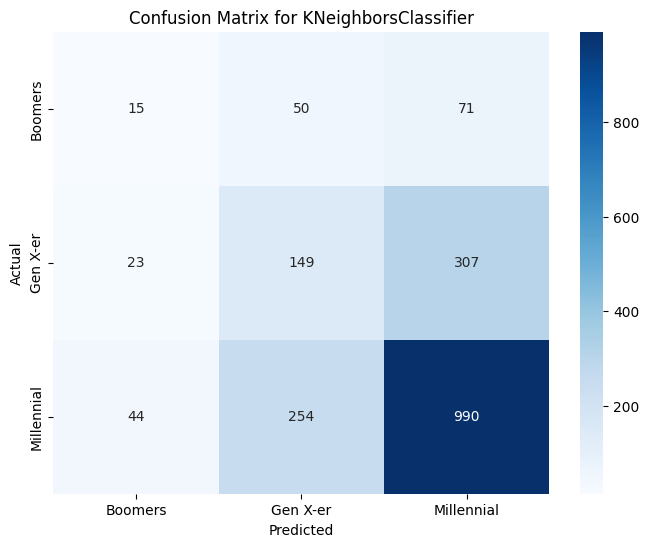

In [79]:
    cm = confusion_matrix(y_test, p)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()
    
    print()

### Given the provided information, individuals' ages have been predicted using regression, and their corresponding generational classifications have been predicted using classification methods.